## Problem Statement :
A fixed wireless telecommunications network provider have launched various products and have developed its business and organization based on the budget operator model, offering better products at Lower Prices to all value conscious customers through a strategy of disruptive innovation that focuses on the subscriber.  They understand the importance of communication and how it affects a person’s life, thus, focusing on providing their services and products to low income families and poor customers that can help them in the need of hour. They are collaborating with an MFI to provide micro-credit on mobile balances to be paid back in 5 days. The Consumer is believed to be defaulter if he deviates from the path of paying back the loaned amount within the time duration of 5 days. For the loan amount of 5 (in Indonesian Rupiah), payback amount should be 6 (in Indonesian Rupiah), while, for the loan amount of 10 (in Indonesian Rupiah), the payback amount should be 12 (in Indonesian Rupiah).

Objective is to build a model which can be used to predict in terms of a probability for each loan transaction, whether the customer will be paying back the loaned amount within 5 days of insurance of loan. In this case, Label ‘1’ indicates that the loan has been payed i.e. Non- defaulter, while, Label ‘0’ indicates that the loan has not been payed i.e. defaulter.  

### Importing Necessary Libraries

In [83]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

#Importing Visualising Libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(color_codes = True)
import scikitplot as skplt
import missingno as msno


#Importing DataCleaning Libraries
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_selection import SelectKBest, f_classif
from imblearn.over_sampling import SMOTE
from collections import Counter

#Importing Classification Models 
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

#Importing Classification Model Evaluation Metrics 
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import cross_val_score

#Importing Hyperparameter Tuning model
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

#Importing Serialization libraries
import joblib

In [84]:
#Loading Dataset
df = pd.read_csv('Data file.csv')
df.head()

Unnamed: 0  label       msisdn    aon  daily_decr30  daily_decr90  \
0           1      0  21408I70789  272.0   3055.050000   3065.150000   
1           2      1  76462I70374  712.0  12122.000000  12124.750000   
2           3      1  17943I70372  535.0   1398.000000   1398.000000   
3           4      1  55773I70781  241.0     21.228000     21.228000   
4           5      1  03813I82730  947.0    150.619333    150.619333   

   rental30  rental90  last_rech_date_ma  last_rech_date_da  last_rech_amt_ma  \
0    220.13    260.13                2.0                0.0              1539   
1   3691.26   3691.26               20.0                0.0              5787   
2    900.13    900.13                3.0                0.0              1539   
3    159.42    159.42               41.0                0.0               947   
4   1098.90   1098.90                4.0                0.0              2309   

   cnt_ma_rech30  fr_ma_rech30  sumamnt_ma_rech30  medianamnt_ma_rech30  \
0              2          21.0             3078.0                1539.0   
1              1           0.0             5787.0                5787.0   
2              1           0.0             1539.0                1539.0   
3              0           0.0                0.0                   0.0   
4              7           2.0            20029.0                2309.0   

   medianmarechprebal30  cnt_ma_rech90  fr_ma_rech90  sumamnt_ma_rech90  \
0                  7.50              2            21               3078   
1                 61.04              1             0               5787   
2                 66.32              1             0               1539   
3                  0.00              1             0                947   
4                 29.00              8             2              23496   

   medianamnt_ma_rech90  medianmarechprebal90  cnt_da_rech30  fr_da_rech30  \
0                1539.0                  7.50            0.0           0.0   
1                5787.0                 61.04            0.0           0.0   
2                1539.0                 66.32            0.0           0.0   
3                 947.0                  2.50            0.0           0.0   
4                2888.0                 35.00            0.0           0.0   

   cnt_da_rech90  fr_da_rech90  cnt_loans30  amnt_loans30  maxamnt_loans30  \
0              0             0            2            12              6.0   
1              0             0            1            12             12.0   
2              0             0            1             6              6.0   
3              0             0            2            12              6.0   
4              0             0            7            42              6.0   

   medianamnt_loans30  cnt_loans90  amnt_loans90  maxamnt_loans90  \
0                 0.0          2.0            12                6   
1                 0.0          1.0            12               12   
2                 0.0          1.0             6                6   
3                 0.0          2.0            12                6   
4                 0.0          7.0            42                6   

   medianamnt_loans90  payback30  payback90 pcircle       pdate  
0                 0.0  29.000000  29.000000     UPW  2016-07-20  
1                 0.0   0.000000   0.000000     UPW  2016-08-10  
2                 0.0   0.000000   0.000000     UPW  2016-08-19  
3                 0.0   0.000000   0.000000     UPW  2016-06-06  
4                 0.0   2.333333   2.333333     UPW  2016-06-22

In [85]:
#Dropping unneccesary column
df.drop(columns = ['Unnamed: 0'],axis=1, inplace = True)

In [86]:
#data.drop_duplicates(inplace=True)

## About Dataset : 


### Target Variable:

- __label__ -Flag indicating whether the user paid back the credit amount within 5 days of issuing the loan{1:success, 0:failure}


### Features : 

- __msisdn__ - mobile number of user
- __aon__ - age on cellular network in days
- __daily_decr30__ - Daily amount spent from main account, averaged over last 30 days (in Indonesian Rupiah)
- __daily_decr90__ - Daily amount spent from main account, averaged over last 90 days (in Indonesian Rupiah)
- __rental30__ - Average main account balance over last 30 days
- __rental90__ - Average main account balance over last 90 days
- __last_rech_date_ma__ - Number of days till last recharge of main account
- __last_rech_date_da__ - Number of days till last recharge of data account
- __last_rech_amt_ma__ - Amount of last recharge of main account (in Indonesian Rupiah)
- __cnt_ma_rech30__ - Number of times main account got recharged in last 30 days
- __fr_ma_rech30__ - Frequency of main account recharged in last 30 days
- __sumamnt_ma_rech30__ - Total amount of recharge in main account over last 30 days (in Indonesian Rupiah)
- __medianamnt_ma_rech30__ - Median of amount of recharges done in main account over last 30 days at user level (in Indonesian Rupiah)
- __medianmarechprebal30__ - Median of main account balance just before recharge in last 30 days at user level (in Indonesian Rupiah)
- __cnt_ma_rech90__ - Number of times main account got recharged in last 90 days
- __fr_ma_rech90__ - frequency of main account got recharged in last 90 days
- __sumamnt_ma_rech90__ - Total amount of recharge in main account over last 90 days (in Indonasian Rupiah)
- __medianamnt_ma_rech90__ - Median of amount of recharges done in main account over last 90 days at user level (in Indonasian Rupiah)
- __medianmarechprebal90__ - Median of main account balance just before recharge in last 90 days at user level (in Indonasian Rupiah)
- __cnt_da_rech30__ - Number of times data account got recharged in last 30 days
- __fr_da_rech30__ - Frequency of data account recharged in last 30 days
- __cnt_da_rech90__ - Number of times data account got recharged in last 90 days
- __fr_da_rech90__ - Frequency of data account recharged in last 90 days
- __cnt_loans30__ - Number of loans taken by user in last 30 days
- __amnt_loans30__ - Total amount of loans taken by user in last 30 days
- __maxamnt_loans30__ - maximum amount of loan taken by the user in last 30 days
- __medianamnt_loans30__ - Median of amounts of loan taken by the user in last 30 days
- __cnt_loans90__ - Number of loans taken by user in last 90 days
- __amnt_loans90__ - Total amount of loans taken by user in last 90 days
- __maxamnt_loans90__ - maximum amount of loan taken by the user in last 90 days
- __medianamnt_loans90__ - Median of amounts of loan taken by the user in last 90 days
- __payback30__ - Average payback time in days over last 30 days
- __payback90__ - Average payback time in days over last 90 days
- __pcircle__ - telecom circle
- __pdate__ - date

In [5]:
# Shape of dataset
print('"Shape of Dataset is Rows: {} Columns: {}'.format(df.shape[0], df.shape[1]))

"Shape of Dataset is Rows: 209593 Columns: 36


In [6]:
#Analsying the dtypes of the variable
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 36 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   label                 209593 non-null  int64  
 1   msisdn                209593 non-null  object 
 2   aon                   209593 non-null  float64
 3   daily_decr30          209593 non-null  float64
 4   daily_decr90          209593 non-null  float64
 5   rental30              209593 non-null  float64
 6   rental90              209593 non-null  float64
 7   last_rech_date_ma     209593 non-null  float64
 8   last_rech_date_da     209593 non-null  float64
 9   last_rech_amt_ma      209593 non-null  int64  
 10  cnt_ma_rech30         209593 non-null  int64  
 11  fr_ma_rech30          209593 non-null  float64
 12  sumamnt_ma_rech30     209593 non-null  float64
 13  medianamnt_ma_rech30  209593 non-null  float64
 14  medianmarechprebal30  209593 non-null  float64
 15  

In [7]:
#Checking for null values
df.isna().sum()

label                   0
msisdn                  0
aon                     0
daily_decr30            0
daily_decr90            0
rental30                0
rental90                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
pcircle                 0
pdate                   0
dtype: int64

<AxesSubplot:>

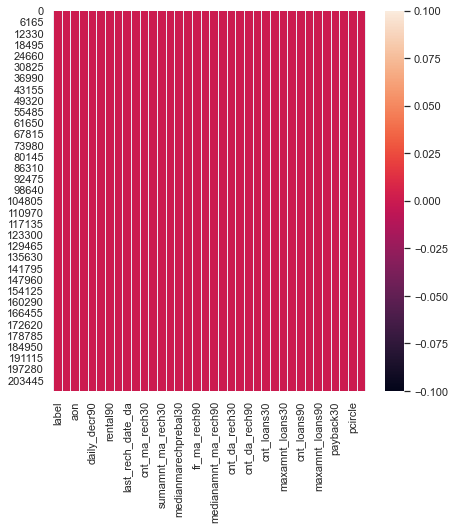

In [8]:
# heatmap to check the missing value
plt.figure(figsize = (7,7))
sns.heatmap(df.isna())

In [9]:
#Checking for duplicate values
df.duplicated().sum()

1

In [10]:
#Dropping duplicate rows
df.drop_duplicates(inplace = True)

#checking for duplpicates again
df.duplicated().sum()

0

In [11]:
#Statistical Overview of our Numerical Features
df.describe()

label            aon   daily_decr30   daily_decr90  \
count  209592.000000  209592.000000  209592.000000  209592.000000   
mean        0.875177    8112.380399    5381.412999    6082.529123   
std         0.330519   75696.261220    9220.644093   10918.836919   
min         0.000000     -48.000000     -93.012667     -93.012667   
25%         1.000000     246.000000      42.439500      42.691917   
50%         1.000000     527.000000    1469.091833    1500.000000   
75%         1.000000     982.000000    7244.096000    7802.795000   
max         1.000000  999860.755168  265926.000000  320630.000000   

            rental30       rental90  last_rech_date_ma  last_rech_date_da  \
count  209592.000000  209592.000000      209592.000000      209592.000000   
mean     2692.578912    3483.407309        3755.865715        3712.220632   
std      4308.596841    5770.475034       53906.020204       53374.960145   
min    -23737.140000  -24720.580000         -29.000000         -29.000000   
25%       280.417500     300.260000           1.000000           0.000000   
50%      1083.540000    1334.000000           3.000000           0.000000   
75%      3356.945000    4201.792500           7.000000           0.000000   
max    198926.110000  200148.110000      998650.377733      999171.809410   

       last_rech_amt_ma  cnt_ma_rech30   fr_ma_rech30  sumamnt_ma_rech30  \
count     209592.000000  209592.000000  209592.000000      209592.000000   
mean        2064.458973       3.978053    3737.372947        7704.496570   
std         2370.790003       4.256099   53643.752523       10139.645685   
min            0.000000       0.000000       0.000000           0.000000   
25%          770.000000       1.000000       0.000000        1540.000000   
50%         1539.000000       3.000000       2.000000        4628.000000   
75%         2309.000000       5.000000       6.000000       10010.000000   
max        55000.000000     203.000000  999606.368132      810096.000000   

       medianamnt_ma_rech30  medianmarechprebal30  cnt_ma_rech90  \
count         209592.000000         209592.000000  209592.000000   
mean            1812.819258           3851.945862       6.315437   
std             2070.869474          54006.502647       7.193487   
min                0.000000           -200.000000       0.000000   
25%              770.000000             11.000000       2.000000   
50%             1539.000000             33.900000       4.000000   
75%             1924.000000             83.000000       8.000000   
max            55000.000000         999479.419319     336.000000   

        fr_ma_rech90  sumamnt_ma_rech90  medianamnt_ma_rech90  \
count  209592.000000      209592.000000         209592.000000   
mean        7.716812       12396.236149           1864.597375   
std        12.590273       16857.832129           2081.685508   
min         0.000000           0.000000              0.000000   
25%         0.000000        2317.000000            773.000000   
50%         2.000000        7226.000000           1539.000000   
75%         8.000000       16000.000000           1924.000000   
max        88.000000      953036.000000          55000.000000   

       medianmarechprebal90  cnt_da_rech30   fr_da_rech30  cnt_da_rech90  \
count         209592.000000  209592.000000  209592.000000  209592.000000   
mean              92.025522     262.579362    3749.512336       0.041495   
std              369.216539    4183.907920   53885.542905       0.397557   
min             -200.000000       0.000000       0.000000       0.000000   
25%               14.600000       0.000000       0.000000       0.000000   
50%               36.000000       0.000000       0.000000       0.000000   
75%               79.310000       0.000000       0.000000       0.000000   
max            41456.500000   99914.441420  999809.240107      38.000000   

        fr_da_rech90    cnt_loans30   amnt_loans30  maxamnt_loans30  \
count  209592.000000  209592.000000  209592.000000    20959

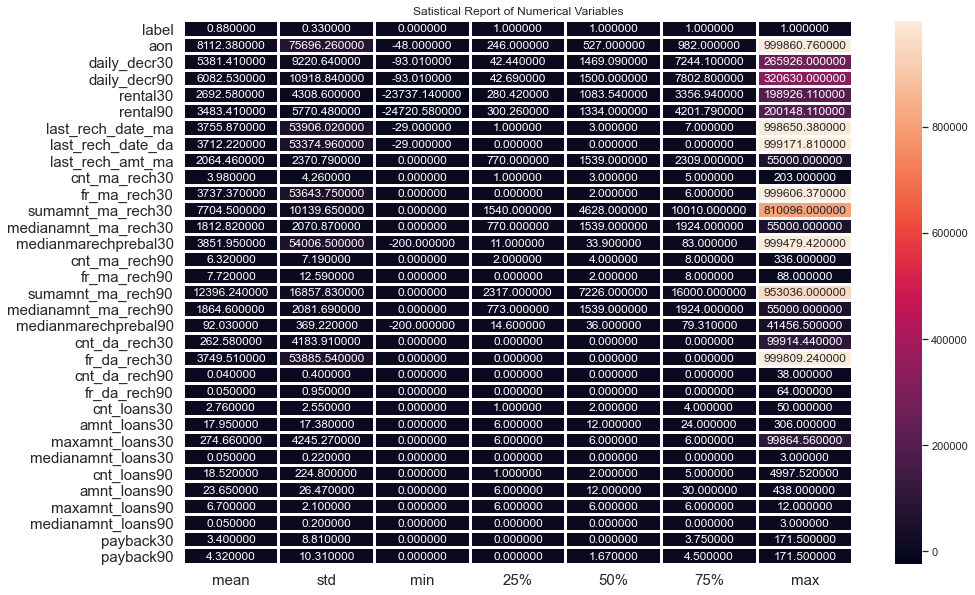

In [12]:
#visualizing statistical description of dataset
plt.figure(figsize = (15,10))
sns.heatmap(round(df.describe()[1:].transpose(),2),linewidth = 2,annot= True, fmt = "f")
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.title("Satistical Report of Numerical Variables")
plt.show()

### Data Cleaning

In [13]:
#Dropping Nominal Data
df.drop('msisdn', axis = 1, inplace = True)

In [14]:
#Seperating Day - Month - Year columns using pandas Datetime function

df['pdate'] = pd.to_datetime(df['pdate'])
df['Month'] = df['pdate'].apply(lambda x:x.month)
df['Day'] = df['pdate'].apply(lambda x:x.day)
df['Year'] = df['pdate'].apply(lambda x:x.year)

In [15]:
df.head()

label    aon  daily_decr30  daily_decr90  rental30  rental90  \
0      0  272.0   3055.050000   3065.150000    220.13    260.13   
1      1  712.0  12122.000000  12124.750000   3691.26   3691.26   
2      1  535.0   1398.000000   1398.000000    900.13    900.13   
3      1  241.0     21.228000     21.228000    159.42    159.42   
4      1  947.0    150.619333    150.619333   1098.90   1098.90   

   last_rech_date_ma  last_rech_date_da  last_rech_amt_ma  cnt_ma_rech30  \
0                2.0                0.0              1539              2   
1               20.0                0.0              5787              1   
2                3.0                0.0              1539              1   
3               41.0                0.0               947              0   
4                4.0                0.0              2309              7   

   fr_ma_rech30  sumamnt_ma_rech30  medianamnt_ma_rech30  \
0          21.0             3078.0                1539.0   
1           0.0             5787.0                5787.0   
2           0.0             1539.0                1539.0   
3           0.0                0.0                   0.0   
4           2.0            20029.0                2309.0   

   medianmarechprebal30  cnt_ma_rech90  fr_ma_rech90  sumamnt_ma_rech90  \
0                  7.50              2            21               3078   
1                 61.04              1             0               5787   
2                 66.32              1             0               1539   
3                  0.00              1             0                947   
4                 29.00              8             2              23496   

   medianamnt_ma_rech90  medianmarechprebal90  cnt_da_rech30  fr_da_rech30  \
0                1539.0                  7.50            0.0           0.0   
1                5787.0                 61.04            0.0           0.0   
2                1539.0                 66.32            0.0           0.0   
3                 947.0                  2.50            0.0           0.0   
4                2888.0                 35.00            0.0           0.0   

   cnt_da_rech90  fr_da_rech90  cnt_loans30  amnt_loans30  maxamnt_loans30  \
0              0             0            2            12              6.0   
1              0             0            1            12             12.0   
2              0             0            1             6              6.0   
3              0             0            2            12              6.0   
4              0             0            7            42              6.0   

   medianamnt_loans30  cnt_loans90  amnt_loans90  maxamnt_loans90  \
0                 0.0          2.0            12                6   
1                 0.0          1.0            12               12   
2                 0.0          1.0             6                6   
3                 0.0          2.0            12                6   
4                 0.0          7.0            42                6   

   medianamnt_loans90  payback30  payback90 pcircle      pdate  Month  Day  \
0                 0.0  29.000000  29.000000     UPW 2016-07-20      7   20   
1                 0.0   0.000000   0.000000     UPW 2016-08-10      8   10   
2                 0.0   0.000000   0.000000     UPW 2016-08-19      8   19   
3                 0.0   0.000000   0.000000     UPW 2016-06-06      6    6   
4                 0.0   2.333333   2.333333     UPW 2016-06-22      6   22   

   Year  
0  2016  
1  2016  
2  2016  
3  2016  
4  2016

In [16]:
#Checking unique values in column pcircle
df['pcircle'].value_counts()

UPW    209592
Name: pcircle, dtype: int64

In [17]:
#Checking unique values in column Year
df['Year'].value_counts()

2016    209592
Name: Year, dtype: int64

In [18]:
#Dropping columns with only one same entry for every field. 

df.drop(columns = ['pdate','pcircle','Year'], axis = True, inplace = True)

In [19]:
df.head()

label    aon  daily_decr30  daily_decr90  rental30  rental90  \
0      0  272.0   3055.050000   3065.150000    220.13    260.13   
1      1  712.0  12122.000000  12124.750000   3691.26   3691.26   
2      1  535.0   1398.000000   1398.000000    900.13    900.13   
3      1  241.0     21.228000     21.228000    159.42    159.42   
4      1  947.0    150.619333    150.619333   1098.90   1098.90   

   last_rech_date_ma  last_rech_date_da  last_rech_amt_ma  cnt_ma_rech30  \
0                2.0                0.0              1539              2   
1               20.0                0.0              5787              1   
2                3.0                0.0              1539              1   
3               41.0                0.0               947              0   
4                4.0                0.0              2309              7   

   fr_ma_rech30  sumamnt_ma_rech30  medianamnt_ma_rech30  \
0          21.0             3078.0                1539.0   
1           0.0             5787.0                5787.0   
2           0.0             1539.0                1539.0   
3           0.0                0.0                   0.0   
4           2.0            20029.0                2309.0   

   medianmarechprebal30  cnt_ma_rech90  fr_ma_rech90  sumamnt_ma_rech90  \
0                  7.50              2            21               3078   
1                 61.04              1             0               5787   
2                 66.32              1             0               1539   
3                  0.00              1             0                947   
4                 29.00              8             2              23496   

   medianamnt_ma_rech90  medianmarechprebal90  cnt_da_rech30  fr_da_rech30  \
0                1539.0                  7.50            0.0           0.0   
1                5787.0                 61.04            0.0           0.0   
2                1539.0                 66.32            0.0           0.0   
3                 947.0                  2.50            0.0           0.0   
4                2888.0                 35.00            0.0           0.0   

   cnt_da_rech90  fr_da_rech90  cnt_loans30  amnt_loans30  maxamnt_loans30  \
0              0             0            2            12              6.0   
1              0             0            1            12             12.0   
2              0             0            1             6              6.0   
3              0             0            2            12              6.0   
4              0             0            7            42              6.0   

   medianamnt_loans30  cnt_loans90  amnt_loans90  maxamnt_loans90  \
0                 0.0          2.0            12                6   
1                 0.0          1.0            12               12   
2                 0.0          1.0             6                6   
3                 0.0          2.0            12                6   
4                 0.0          7.0            42                6   

   medianamnt_loans90  payback30  payback90  Month  Day  
0                 0.0  29.000000  29.000000      7   20  
1                 0.0   0.000000   0.000000      8   10  
2                 0.0   0.000000   0.000000      8   19  
3                 0.0   0.000000   0.000000      6    6  
4                 0.0   2.333333   2.333333      6   22

### Multivariate Analysis

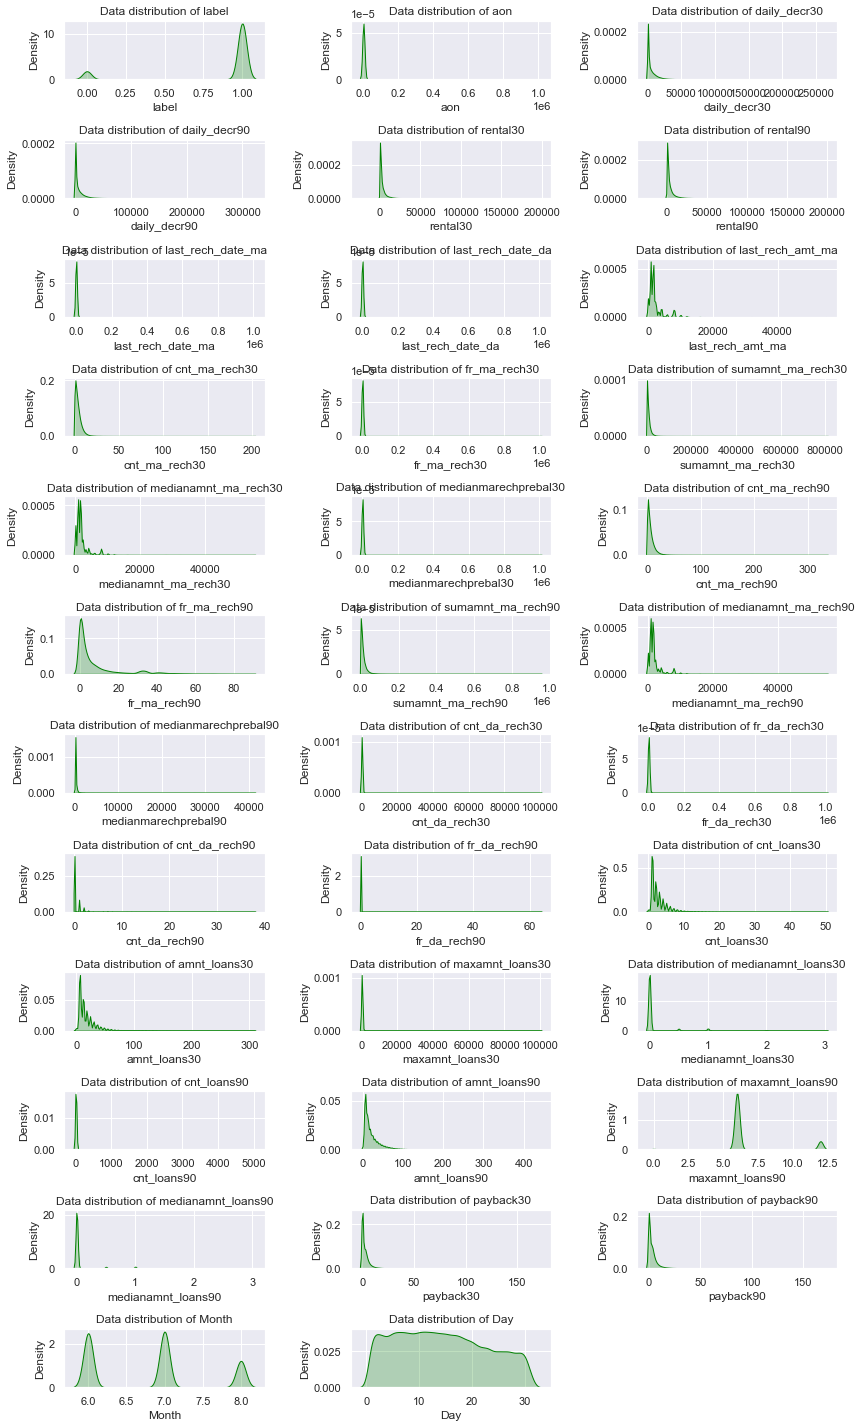

In [20]:
#Visualising Data distribution of our dataset
plt.figure(figsize = (12,20), facecolor ='white')
plotnumber=1

for column in df:
    if plotnumber<=37: 
        ax = plt.subplot(12,3,plotnumber)
        sns.kdeplot(df[column], shade=True, color = 'green')
        plt.title('Data distribution of ' + column)
    plotnumber+=1
plt.tight_layout()

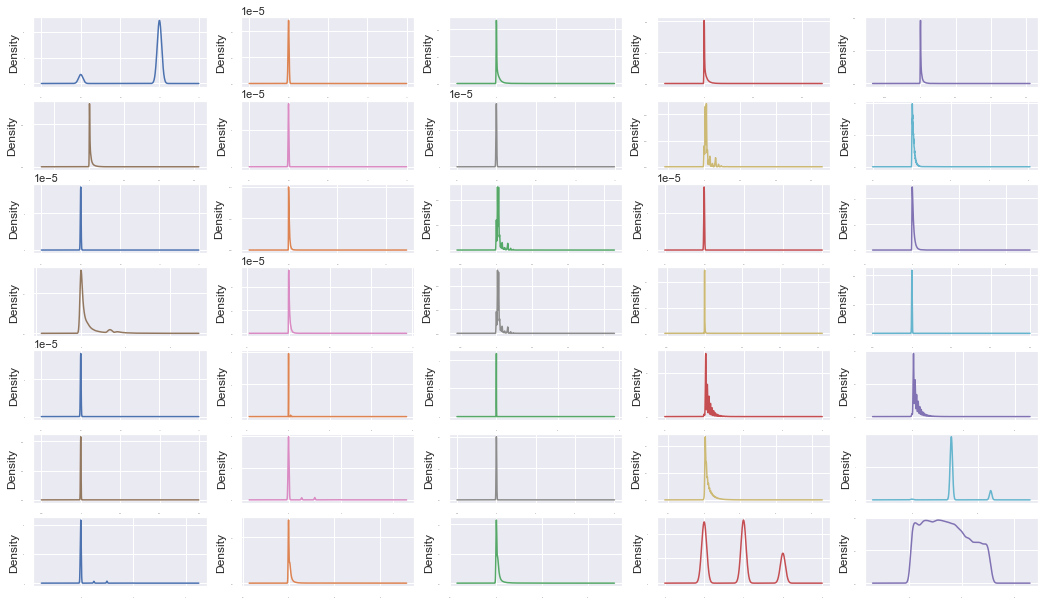

In [21]:
#data distribution (multivariate)
df.plot(kind='density',subplots=True,layout=(8,5), sharex = False, legend = False, fontsize = 1, figsize=(18,12))
plt.show()

label                      AxesSubplot(0.125,0.799681;0.133621x0.0803191)
aon                     AxesSubplot(0.285345,0.799681;0.133621x0.0803191)
daily_decr30             AxesSubplot(0.44569,0.799681;0.133621x0.0803191)
daily_decr90            AxesSubplot(0.606034,0.799681;0.133621x0.0803191)
rental30                AxesSubplot(0.766379,0.799681;0.133621x0.0803191)
rental90                   AxesSubplot(0.125,0.703298;0.133621x0.0803191)
last_rech_date_ma       AxesSubplot(0.285345,0.703298;0.133621x0.0803191)
last_rech_date_da        AxesSubplot(0.44569,0.703298;0.133621x0.0803191)
last_rech_amt_ma        AxesSubplot(0.606034,0.703298;0.133621x0.0803191)
cnt_ma_rech30           AxesSubplot(0.766379,0.703298;0.133621x0.0803191)
fr_ma_rech30               AxesSubplot(0.125,0.606915;0.133621x0.0803191)
sumamnt_ma_rech30       AxesSubplot(0.285345,0.606915;0.133621x0.0803191)
medianamnt_ma_rech30     AxesSubplot(0.44569,0.606915;0.133621x0.0803191)
medianmarechprebal30    AxesSubplot(0.

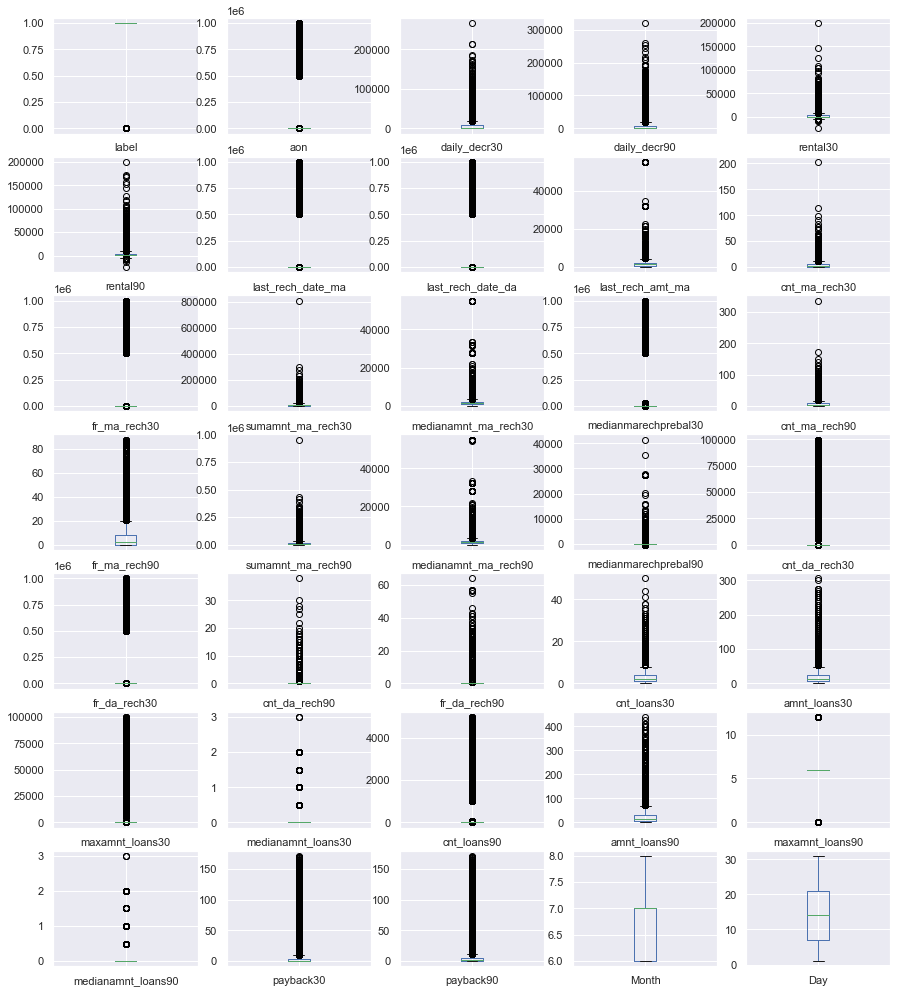

In [22]:
#Visualising Skewness
df.plot(kind ='box', subplots = True, layout = (8,5), figsize = (15,20))

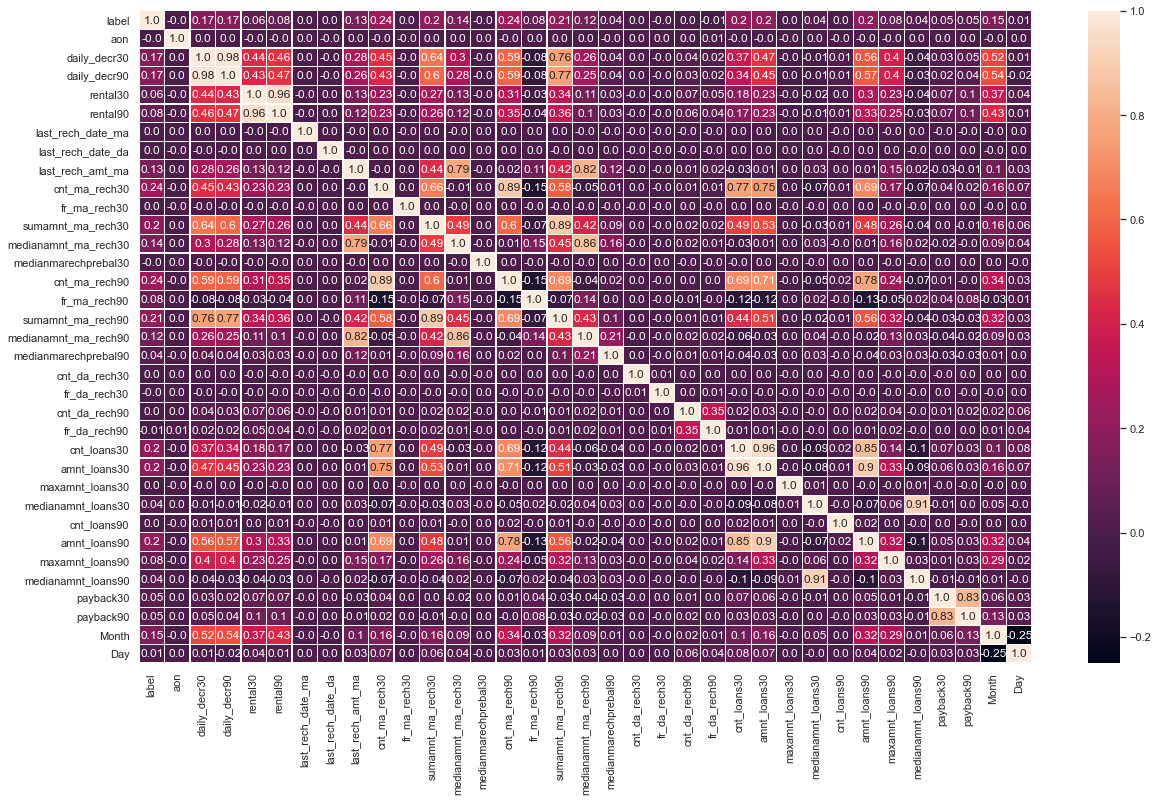

In [23]:
#Checking Correlation among features
plt.figure(figsize = (20,12))
sns.heatmap(round(df.corr(),2), annot = True, linewidth = .2 , fmt = '1')
plt.show()

- cnt_loans30 and amnt_loans30 are highly positively correlated.
- daily_decr30 and daily_decr90 are highly positively correlated.
- sumamnt_ma_rech30 is moderately positively correlated with daily_decr30, daily_decr90 and cnt_ma_rech90.
- mediaamnt_ma_rech30 is highly positively correlated with last_rech_amt_ma.
- cnt_ma_rech90 is highly positively correlated with cnt_ma_rech30.
- sumamnt_ma_rech90 is positively correlated with daily_decr30, daily_decr90 and cnt_ma_rech90.
- mediaamnt_ma_rech90 is highly positively correlated with last_rech_amt_ma and mediamarechpreble90.
- cnt_loans30 is correlated with cnt_ma_rech30 and cnt_ma_rech90.
- amnt_loans30 is is moderately correlated with cnt_ma_rech30 and cnt_ma_rech90.
- amnt_loans90  is highly correlated with cnt_loans30, amnt_loans30, cnt_ma_rech90 and cnt_ma_rech30.
- medianamnt_loans90 is highly positively correlated with medianamnt_loans30.
- payback30 and payback90 are highly positively correlated with each other.

In [21]:
X = df.drop('label',axis=1)
y = df.label

## Balancing dataset using SMOTE

- The dataset is imbalanced. Label ‘1’ has approximately 87.5% records, while, label ‘0’ has approximately 12.5% records.

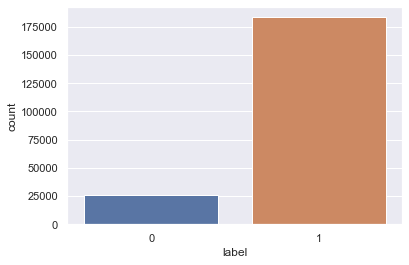

In [22]:
#Univariate Analysis

sns.countplot(x ='label' , data = df)
plt.show()

In [23]:
#instantiating and fitting Smote
sm = SMOTE()
X_smote, y_smote = sm.fit_resample(X,y)

In [24]:
#print Count of class before oversampling and after oversampling
print('Before SMOTE : ',Counter(y))
print('After SMOTE : ',Counter(y_smote))

Before SMOTE :  Counter({1: 183430, 0: 26162})
After SMOTE :  Counter({0: 183430, 1: 183430})


Text(0.5, 1.0, 'After using Smote')

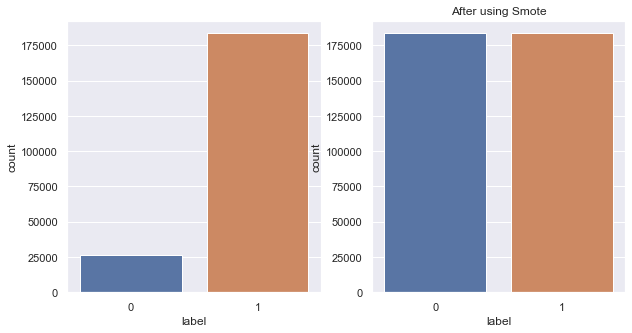

In [25]:
#Visualising class imbalance and after using smote

fig, ax = plt.subplots(1,2, figsize = (10,5),)

sns.countplot(y, ax =ax [0])
plt.title("Before using Smote")

sns.countplot(y_smote, ax =ax[1])
plt.title("After using Smote")

In [26]:
print("Shape of the Dataset before using SMOTE for Oversampling :",X.shape)
print("Shape of the Dataset after using SMOTE for Oversampling :",X_smote.shape)

Shape of the Dataset before using SMOTE for Oversampling : (209592, 34)
Shape of the Dataset after using SMOTE for Oversampling : (366860, 34)


### Model Building

In [27]:
pt = PowerTransformer(method='yeo-johnson')
trans_X = pd.DataFrame(pt.fit_transform(X_smote), columns = X_smote.columns)

aon                        AxesSubplot(0.125,0.799681;0.133621x0.0803191)
daily_decr30            AxesSubplot(0.285345,0.799681;0.133621x0.0803191)
daily_decr90             AxesSubplot(0.44569,0.799681;0.133621x0.0803191)
rental30                AxesSubplot(0.606034,0.799681;0.133621x0.0803191)
rental90                AxesSubplot(0.766379,0.799681;0.133621x0.0803191)
last_rech_date_ma          AxesSubplot(0.125,0.703298;0.133621x0.0803191)
last_rech_date_da       AxesSubplot(0.285345,0.703298;0.133621x0.0803191)
last_rech_amt_ma         AxesSubplot(0.44569,0.703298;0.133621x0.0803191)
cnt_ma_rech30           AxesSubplot(0.606034,0.703298;0.133621x0.0803191)
fr_ma_rech30            AxesSubplot(0.766379,0.703298;0.133621x0.0803191)
sumamnt_ma_rech30          AxesSubplot(0.125,0.606915;0.133621x0.0803191)
medianamnt_ma_rech30    AxesSubplot(0.285345,0.606915;0.133621x0.0803191)
medianmarechprebal30     AxesSubplot(0.44569,0.606915;0.133621x0.0803191)
cnt_ma_rech90           AxesSubplot(0.

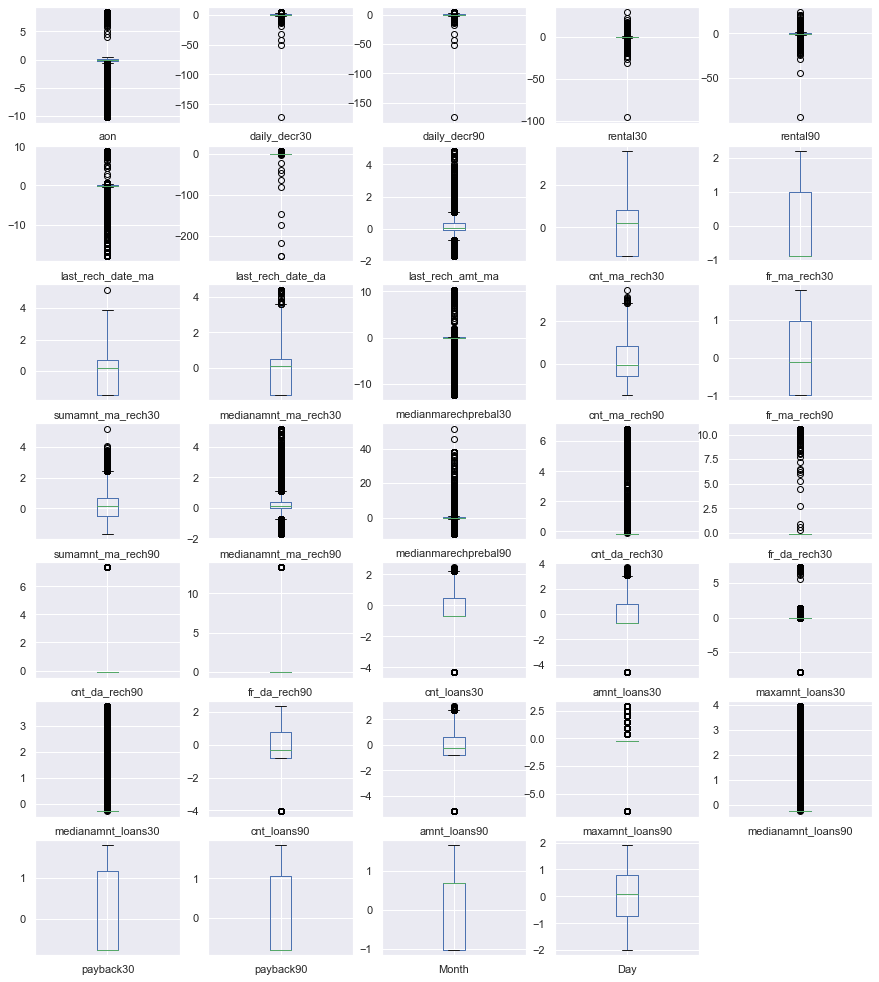

In [28]:
#Multivariate Analysis
#Visualising Skewness
trans_X.plot(kind ='box', subplots = True, layout = (8,5), figsize = (15,20))

In [29]:
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(trans_X), columns = trans_X.columns)

In [30]:
X_scaled

aon  daily_decr30  daily_decr90  rental30  rental90  \
0      -0.149995      0.651493      0.624207 -0.533829 -0.520351   
1       0.056313      1.392274      1.337769  0.430901  0.259205   
2      -0.012357      0.316252      0.297680 -0.307805 -0.345747   
3      -0.171359     -0.783767     -0.778742 -0.557559 -0.552679   
4       0.132023     -0.388065     -0.389337 -0.248407 -0.296824   
...          ...           ...           ...       ...       ...   
366855 -0.254302     -0.732309     -0.727916 -0.462999 -0.474014   
366856 -0.020144     -1.168126     -1.160853 -0.544392 -0.541688   
366857 -0.100413      0.133660      0.120165 -0.328731 -0.352526   
366858 -0.011528      0.799191      0.768334  2.625713  2.424855   
366859 -0.235438     -1.168126     -1.160853 -0.633337 -0.616540   

        last_rech_date_ma  last_rech_date_da  last_rech_amt_ma  cnt_ma_rech30  \
0               -0.051008          -0.077522          0.371449       0.216014   
1                0.207064          -0.077522          1.500093      -0.315547   
2               -0.020065          -0.077522          0.371449      -0.315547   
3                0.332527          -0.077522          0.057858      -1.347624   
4                0.005463          -0.077522          0.670856       1.313951   
...                   ...                ...               ...            ...   
366855           0.102367          -0.077522         -0.062476       0.818721   
366856          -0.151213          -0.077522         -1.688838      -1.347624   
366857          -0.151213          -0.077522         -1.688838      -1.347624   
366858           0.118222          -0.077522          0.670856       0.216014   
366859          -0.151213          -0.077522         -1.688838      -1.347624   

        fr_ma_rech30  sumamnt_ma_rech30  medianamnt_ma_rech30  \
0           1.684034           0.314737              0.511420   
1          -0.898236           0.628116              1.541463   
2          -0.898236           0.014472              0.511420   
3          -0.898236          -1.513442             -1.549957   
4           0.559404           1.376800              0.788627   
...              ...                ...                   ...   
366855      1.184926           0.508774              0.109371   
366856     -0.898236          -1.513442             -1.549957   
366857     -0.898236          -1.513442             -1.549957   
366858      1.377191           0.347347              0.556872   
366859     -0.898236          -1.513442             -1.549957   

        medianmarechprebal30  cnt_ma_rech90  fr_ma_rech90  sumamnt_ma_rech90  \
0                  -0.017874      -0.060717      1.441583           0.072361   
1                   0.040038      -0.537889     -0.976619           0.375880   
2                   0.043825      -0.537889     -0.976619          -0.216311   
3                  -0.040864      -0.537889     -0.976619          -0.394153   
4                   0.012217       1.063826      0.288841           1.218213   
...                      ...            ...           ...                ...   
366855              0.010180       0.954049      0.288841           0.475287   
366856             -0.040864      -1.442557     -0.976619          -1.634845   
366857             -0.040864      -1.442557     -0.976619          -1.634845   
366858              0.064910       0.256498      1.344972           0.497682   
366859             -0.040864      -1.442557     -0.976619          -1.634845   

        medianamnt_ma_rech90  medianmarechprebal90  cnt_da_rech30  \
0                   0.410784             -0.220838      -0.147758   
1                   1.608060              0.101583      -0.147758   
2                   0.410784              0.127700      -0.147758   
3                   0.081736             -0.266990      -0.147758   
4                   0.918590             -0.037310      -0.147758   
...                      ...                   ...            ...  

In [31]:
#Splitting Dataset into training and testing data using train_test_split 
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y_smote,test_size = 0.25)

### Logistic Regression

In [32]:
#Finding Random state using LogisticRegression
maxAccu=0
maxRS = 0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(X_scaled,y_smote,test_size=0.2,random_state=i)
    LR = LogisticRegression()
    LR.fit(x_train,y_train)
    predlr = LR.predict(x_test)
    acc = accuracy_score(y_test,predlr)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is",maxAccu,"on random_state",maxRS)

Best accuracy is 0.8042032382925367 on random_state 33


In [33]:
#model instantiating and fitting
LR = LogisticRegression(random_state = 169)
LR.fit(x_train,y_train)
predlr = LR.predict(x_test)
acc = accuracy_score(y_test,predlr)
acc

0.7998555307201657

In [34]:
# Performing Evaluation metrics for our model
predlr=LR.predict(x_test)
print('Accuracy Score for Logistic Regression is :',round(accuracy_score(y_test,predlr),4)*100,'% \n')
print('Confusion Matrix of Logistic Regression : \n',confusion_matrix(y_test,predlr), '\n')
print('Classification Logistic Regression : \n',classification_report(y_test,predlr))

Accuracy Score for Logistic Regression is : 79.99000000000001 % 

Confusion Matrix of Logistic Regression : 
 [[29823  6989]
 [ 7696 28864]] 

Classification Logistic Regression : 
               precision    recall  f1-score   support

           0       0.79      0.81      0.80     36812
           1       0.81      0.79      0.80     36560

    accuracy                           0.80     73372
   macro avg       0.80      0.80      0.80     73372
weighted avg       0.80      0.80      0.80     73372



array([[29823,  6989],
       [ 7696, 28864]], dtype=int64)

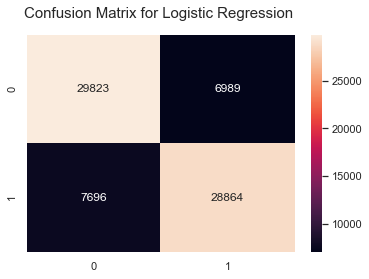

In [35]:
cm = confusion_matrix(y_test,predlr)
#visualize confusion matrix 
sns.heatmap(confusion_matrix(y_test,predlr),annot=True,fmt='3.0f',cmap="rocket")
plt.title('Confusion Matrix for Logistic Regression ', y=1.05, size=15)
cm

### Decision Tree Classifier

In [36]:
#Instantiating Decision Tree model and training it
DT = DecisionTreeClassifier()
DT.fit(x_train,y_train)

DecisionTreeClassifier()

In [37]:
DT.score(x_test,y_test)

0.9095158916207817

In [38]:
# Performing Evaluation metrics for our model
preddt=DT.predict(x_test)
print('Accuracy Score for Decision Treee is :',round(accuracy_score(y_test,preddt),4)*100,'% \n')
print('Confusion Matrix of Decision Tree: \n',confusion_matrix(y_test,preddt), '\n')
print('Classification Decision Tree: \n',classification_report(y_test,preddt))

Accuracy Score for Decision Treee is : 90.95 % 

Confusion Matrix of Decision Tree: 
 [[33817  2995]
 [ 3644 32916]] 

Classification Decision Tree: 
               precision    recall  f1-score   support

           0       0.90      0.92      0.91     36812
           1       0.92      0.90      0.91     36560

    accuracy                           0.91     73372
   macro avg       0.91      0.91      0.91     73372
weighted avg       0.91      0.91      0.91     73372



array([[33817,  2995],
       [ 3644, 32916]], dtype=int64)

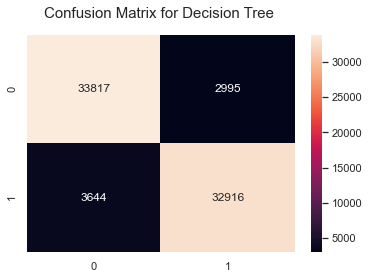

In [39]:
cm = confusion_matrix(y_test,preddt)
#visualize confusion matrix 
sns.heatmap(confusion_matrix(y_test,preddt),annot=True,fmt='3.0f',cmap="rocket")
plt.title('Confusion Matrix for Decision Tree ', y=1.05, size=15)
cm

### Random Forest Classifier

In [40]:
#Model instantiating and training it
RF = RandomForestClassifier()
RF.fit(x_train,y_train)


RandomForestClassifier()

In [41]:
# Performing Evaluation metrics for our model
predrf=RF.predict(x_test)
print('Accuracy Score for Random Forest Classifier is :',round(accuracy_score(y_test,predrf),4)*100,'% \n')
print('Confusion Matrix of Random Forest Classifier : \n',confusion_matrix(y_test,predrf), '\n')
print('Classification Random Forest Classifier : \n',classification_report(y_test,predrf))

Accuracy Score for Random Forest Classifier is : 94.94 % 

Confusion Matrix of Random Forest Classifier : 
 [[34900  1912]
 [ 1797 34763]] 

Classification Random Forest Classifier : 
               precision    recall  f1-score   support

           0       0.95      0.95      0.95     36812
           1       0.95      0.95      0.95     36560

    accuracy                           0.95     73372
   macro avg       0.95      0.95      0.95     73372
weighted avg       0.95      0.95      0.95     73372



array([[34900,  1912],
       [ 1797, 34763]], dtype=int64)

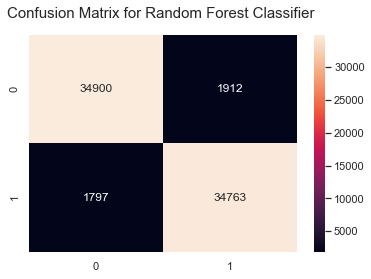

In [42]:
cm = confusion_matrix(y_test,predrf)
#visualize confusion matrix 
sns.heatmap(confusion_matrix(y_test,predrf),annot=True,fmt='3.0f',cmap="rocket")
plt.title('Confusion Matrix for Random Forest Classifier ', y=1.05, size=15)
cm

### Gradient Boosting Classifier

In [43]:
from sklearn.ensemble import GradientBoostingClassifier

In [44]:
#Instantiating SVC model and training it

grad = GradientBoostingClassifier()
grad.fit(x_train,y_train)

GradientBoostingClassifier()

In [47]:
# Performing Evaluation metrics for our model
gradpred=grad.predict(x_test)
print('Accuracy Score for Gradient Boosting Classifier is :',round(accuracy_score(y_test,gradpred),4)*100,'% \n')
print('Confusion Matrix of Gradient Boosting Classifier: \n',confusion_matrix(y_test,gradpred), '\n')
print('Classification Gradient Boosting Classifier: \n',classification_report(y_test,gradpred))

Accuracy Score for Gradient Boosting Classifier is : 90.35 % 

Confusion Matrix of Gradient Boosting Classifier: 
 [[33669  3143]
 [ 3937 32623]] 

Classification Gradient Boosting Classifier: 
               precision    recall  f1-score   support

           0       0.90      0.91      0.90     36812
           1       0.91      0.89      0.90     36560

    accuracy                           0.90     73372
   macro avg       0.90      0.90      0.90     73372
weighted avg       0.90      0.90      0.90     73372



array([[33669,  3143],
       [ 3937, 32623]], dtype=int64)

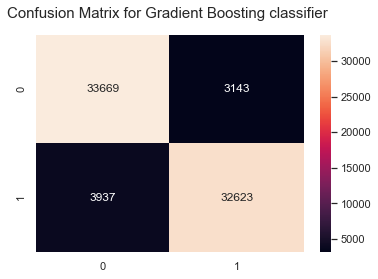

In [48]:
cm = confusion_matrix(y_test,gradpred)
#visualize confusion matrix 
sns.heatmap(confusion_matrix(y_test,gradpred),annot=True,fmt='3.0f')
plt.title('Confusion Matrix for Gradient Boosting classifier ', y=1.05, size=15)
cm

### Bagging Classifier

In [49]:
from sklearn.ensemble import BaggingClassifier

In [50]:
#Instantiating model and fitting model

BG = BaggingClassifier()
BG.fit(x_train,y_train)

BaggingClassifier()

In [51]:
# Performing Evaluation metrics for our model
predbg=BG.predict(x_test)
print('Accuracy Score for Bagging Classifier is :',round(accuracy_score(y_test,predbg),4)*100,'% \n')
print('Confusion Matrix of Bagging Classifier is : \n',confusion_matrix(y_test,predbg), '\n')
print('Classification  for Bagging Classifier : \n',classification_report(y_test,predbg))

Accuracy Score for Bagging Classifier is : 93.62 % 

Confusion Matrix of Bagging Classifier is : 
 [[34856  1956]
 [ 2728 33832]] 

Classification  for Bagging Classifier : 
               precision    recall  f1-score   support

           0       0.93      0.95      0.94     36812
           1       0.95      0.93      0.94     36560

    accuracy                           0.94     73372
   macro avg       0.94      0.94      0.94     73372
weighted avg       0.94      0.94      0.94     73372



array([[34856,  1956],
       [ 2728, 33832]], dtype=int64)

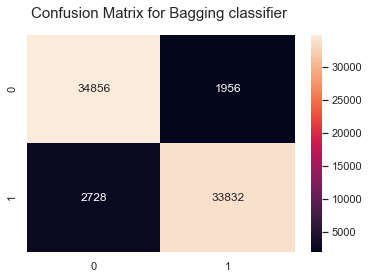

In [52]:
cm = confusion_matrix(y_test,predbg)
#visualize confusion matrix 
sns.heatmap(confusion_matrix(y_test,predbg),annot=True,fmt='3.0f')
plt.title('Confusion Matrix for Bagging classifier ', y=1.05, size=15)
cm

### Adaboost Classifier

In [53]:
from sklearn.ensemble import AdaBoostClassifier

In [54]:
#Instantiating model and fitting model

adaboost = AdaBoostClassifier()
adaboost.fit(x_train,y_train)

AdaBoostClassifier()

In [55]:
# Performing Evaluation metrics for our model
predada=adaboost.predict(x_test)
print('Accuracy Score for AdaBoost is :',round(accuracy_score(y_test,predada),4)*100,'% \n')
print('Confusion Matrix of AdaBoost : \n',confusion_matrix(y_test,predada), '\n')
print('Classification AdaBoost : \n',classification_report(y_test,predada))

Accuracy Score for AdaBoost is : 85.94000000000001 % 

Confusion Matrix of AdaBoost : 
 [[32533  4279]
 [ 6038 30522]] 

Classification AdaBoost : 
               precision    recall  f1-score   support

           0       0.84      0.88      0.86     36812
           1       0.88      0.83      0.86     36560

    accuracy                           0.86     73372
   macro avg       0.86      0.86      0.86     73372
weighted avg       0.86      0.86      0.86     73372



array([[32533,  4279],
       [ 6038, 30522]], dtype=int64)

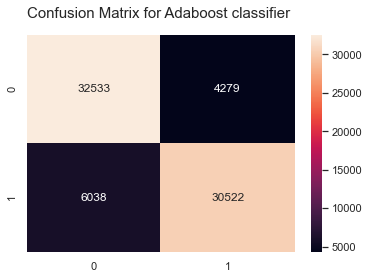

In [56]:
cm = confusion_matrix(y_test,predada)
#visualize confusion matrix 
sns.heatmap(confusion_matrix(y_test,predada),annot=True,fmt='3.0f',cmap="rocket")
plt.title('Confusion Matrix for Adaboost classifier ', y=1.05, size=15)
cm

## XG Boost

In [57]:
from xgboost import XGBClassifier

In [58]:
xgb = XGBClassifier(objective = 'binary:logistic')
xgb.fit(x_train,y_train)

[15:39:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [59]:
# Performing Evaluation metrics for our model
xgbpred=xgb.predict(x_test)
print('Accuracy Score for XGB Classifier is :',round(accuracy_score(y_test,xgbpred),4)*100,'% \n')
print('Confusion Matrix of XGB Classifier is : \n',confusion_matrix(y_test,xgbpred), '\n')
print('Classification  for XGB Classifier : \n',classification_report(y_test,xgbpred))

Accuracy Score for XGB Classifier is : 94.45 % 

Confusion Matrix of XGB Classifier is : 
 [[34526  2286]
 [ 1788 34772]] 

Classification  for XGB Classifier : 
               precision    recall  f1-score   support

           0       0.95      0.94      0.94     36812
           1       0.94      0.95      0.94     36560

    accuracy                           0.94     73372
   macro avg       0.94      0.94      0.94     73372
weighted avg       0.94      0.94      0.94     73372



array([[34526,  2286],
       [ 1788, 34772]], dtype=int64)

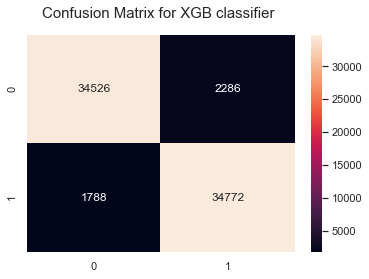

In [60]:
cm = confusion_matrix(y_test,xgbpred)
#visualize confusion matrix 
sns.heatmap(confusion_matrix(y_test,xgbpred),annot=True,fmt='3.0f',cmap="rocket")
plt.title('Confusion Matrix for XGB classifier ', y=1.05, size=15)
cm

### Cross Validation Score

In [62]:
CVscore_LR = cross_val_score(LR,X_scaled,y_smote,cv = 10 )
print("Cross validation score of Logistic Regression is :", round(CVscore_LR.mean(),4)*100,'%')

CVscore_DT = cross_val_score(DT,X_scaled,y_smote,cv = 10 )
print("Cross validation score of Decision Tree is :", round(CVscore_DT.mean(),4)*100,'%')

CVscore_RF = cross_val_score(RF,X_scaled,y_smote,cv = 10 )
print("Cross validation score of Random Forest Classifier :", round(CVscore_RF.mean(),4)*100,'%')

CVscore_grad = cross_val_score(grad,X_scaled,y_smote,cv = 10 )
print("Cross validation score of Gradient Boosting Classifier is :",round(CVscore_grad.mean(),4)*100,'%')

CVscore_adaboost = cross_val_score(adaboost,X_scaled,y_smote,cv = 10 )
print("Cross validation score of AdaBoost Classifier is :",round(CVscore_adaboost.mean(),4)*100,'%')

CVscore_xgb = cross_val_score(xgb,X_scaled,y_smote,cv = 10 )
print("Cross validation score of XGB Classifier is :",round(CVscore_xgb.mean(),4)*100,'%')

CVscore_BG = cross_val_score(BG,X_scaled,y_smote, cv = 10)
print("Cross validation score of Bagging Classifier:", round(CVscore_BG.mean(),3)*100,'%')

Cross validation score of Logistic Regression is : 80.0 %
Cross validation score of Decision Tree is : 90.98 %
Cross validation score of Random Forest Classifier : 94.85 %
Cross validation score of Gradient Boosting Classifier is : 90.0 %
Cross validation score of AdaBoost Classifier is : 85.92 %
[17:40:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:43:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:46:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/s

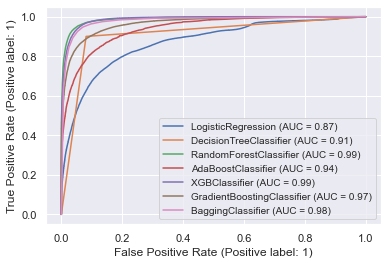

In [64]:
disp = plot_roc_curve(LR,x_test,y_test)

plot_roc_curve(DT ,x_test,y_test,ax=disp.ax_)   #ax_ - axes with confusion matrix

plot_roc_curve(RF,x_test,y_test, ax=disp.ax_)

plot_roc_curve(adaboost,x_test,y_test, ax=disp.ax_)

plot_roc_curve(xgb,x_test,y_test, ax=disp.ax_)

plot_roc_curve(grad,x_test,y_test, ax=disp.ax_)

plot_roc_curve(BG,x_test,y_test, ax=disp.ax_)

plt.legend(prop={'size':10}, loc = 'best')

plt.show()

### Conclusion

### Conclusion :
- Among all other models Random Forest Boosting Classification Model seems to giving us high scores among all evaluation metrics : 
    - Accuracy Score: 0.94
    - Precision : 0.95
    - Recall : 0.95
    - F1 : 0.95
    - Cross validation : 0.94
    - Auc Score : 0.99

#### HyperParameter Tuning


In [65]:
from sklearn.model_selection import RandomizedSearchCV

In [66]:
params = {'min_samples_leaf':[1,2,3,4,5],
         'n_estimators' : [70,80,90,100],
         'criterion' : ['gini','entropy'],
         'max_depth':[3,5,7,9],
         'min_samples_split':[2,3,4,5,6]}

In [70]:
#Instantiating Randomized SearchCV
randomcv = RandomizedSearchCV(estimator = RF, param_distributions = params, n_iter = 20, cv = 3, verbose=2, random_state=42)

In [71]:
#fitting our random search cv model
randomcv.fit(x_train,y_train)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV] END criterion=entropy, max_depth=7, min_samples_leaf=5, min_samples_split=6, n_estimators=70; total time=  51.9s
[CV] END criterion=entropy, max_depth=7, min_samples_leaf=5, min_samples_split=6, n_estimators=70; total time=  57.3s
[CV] END criterion=entropy, max_depth=7, min_samples_leaf=5, min_samples_split=6, n_estimators=70; total time= 1.0min
[CV] END criterion=entropy, max_depth=7, min_samples_leaf=4, min_samples_split=3, n_estimators=100; total time= 1.8min
[CV] END criterion=entropy, max_depth=7, min_samples_leaf=4, min_samples_split=3, n_estimators=100; total time= 1.7min
[CV] END criterion=entropy, max_depth=7, min_samples_leaf=4, min_samples_split=3, n_estimators=100; total time= 1.7min
[CV] END criterion=gini, max_depth=3, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=  42.0s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=  49

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [3, 5, 7, 9],
                                        'min_samples_leaf': [1, 2, 3, 4, 5],
                                        'min_samples_split': [2, 3, 4, 5, 6],
                                        'n_estimators': [70, 80, 90, 100]},
                   random_state=42, verbose=2)

In [72]:
#To check the best parameters to increase model Accuracy
randomcv.best_params_

{'n_estimators': 80,
 'min_samples_split': 6,
 'min_samples_leaf': 4,
 'max_depth': 9,
 'criterion': 'gini'}

In [73]:
model = RandomForestClassifier(n_estimators = 80, min_samples_split = 6, min_samples_leaf = 4, max_depth = 9, criterion = 'gini')

In [74]:
#Fitting our Tuned Model
model.fit(x_train,y_train)

RandomForestClassifier(max_depth=9, min_samples_leaf=4, min_samples_split=6,
                       n_estimators=80)

In [75]:
# Performing Evaluation metrics for our model
y_pred = model.predict(x_test)
print('Accuracy Score for Random Forest Classifier is :',round(accuracy_score(y_test,y_pred),4)*100,'% \n')
print('Confusion Matrix of Random Forest Classifier : \n',confusion_matrix(y_test,y_pred), '\n')
print('Classification Random Forest Classifier : \n',classification_report(y_test,y_pred))

Accuracy Score for Random Forest Classifier is : 87.85 % 

Confusion Matrix of Random Forest Classifier : 
 [[32839  3973]
 [ 4942 31618]] 

Classification Random Forest Classifier : 
               precision    recall  f1-score   support

           0       0.87      0.89      0.88     36812
           1       0.89      0.86      0.88     36560

    accuracy                           0.88     73372
   macro avg       0.88      0.88      0.88     73372
weighted avg       0.88      0.88      0.88     73372



array([[32839,  3973],
       [ 4942, 31618]], dtype=int64)

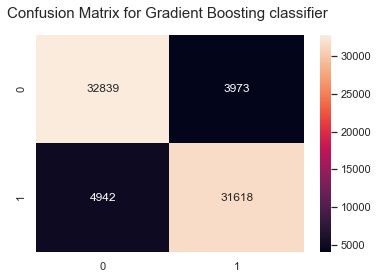

In [76]:
cm = confusion_matrix(y_test,y_pred)

#visualize confusion matrix 

sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='3.0f')
plt.title('Confusion Matrix for Gradient Boosting classifier ', y=1.05, size=15)
cm

<AxesSubplot:title={'center':'Normalized Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

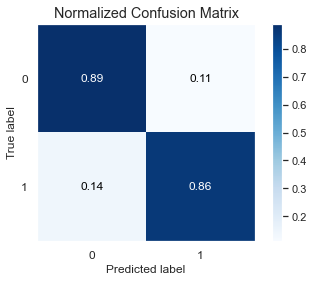

In [77]:
#Plotting Confusion Matrix Gradient Boosting Classifier model
skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=True)

### Saving Our Final Model

In [78]:
joblib.dump(model,"MicroCreditDefaulter.pkl")

['MicroCreditDefaulter.pkl']

### Loading Our Final Model

In [79]:
Model = joblib.load("MicroCreditDefaulter.pkl")

In [80]:
#predicting test data using loaded model
prediction = Model.predict(x_test)
prediction

array([1, 1, 0, ..., 1, 0, 1], dtype=int64)

In [81]:
#Analysing Predicted vs Actual
results = pd.DataFrame()
results['Predicted'] = prediction
results['Actual'] = y
results

Predicted  Actual
0              1       0
1              1       1
2              0       1
3              0       1
4              0       1
...          ...     ...
73367          1       1
73368          0       1
73369          1       1
73370          0       1
73371          1       1

[73372 rows x 2 columns]

In [82]:
#Converting the saved file into .csv format
results.to_csv('Results.csv',index = True)